---
---

<h1><center><ins>Exercise Sheet 6</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

## Exercise 1 - Radioactive decay

Radioactive decay is the process by which an unstable atomic nucleus loses energy by radiation. The fundamental law of radioactive decay is based on the fact that the decay, i.e. the transition of a parent nucleus to a daughter nucleus is a purely statistical process. The disintegration (decay) probability is a fundamental property of an atomic nucleus and remains equal in time. Mathematically this law is expressed as: 

$$ \frac{d N}{dt} = - \lambda N \ , $$

where $N$ is the number of radioactive nuclei, $dN/dt$ the variation of this number per unit of time, and $\lambda$ is thus the probability of decay per nucleus per unit of time. A more intuitive representation of exponential decay is the time required for the decaying quantity to fall to one half of its initial value. This time, $t_{1/2}$, is called "half-life", and can be written in terms of the decay constant as:

$$ t_{1/2} = \frac{\ln(2)}{\lambda} \ . $$

Let's consider here Carbon-14, for which the decay constant is $\lambda \sim 1.21 \times 10^{-4}$ yr$^{-1}$, and which has a half-life $t_{1/2} \sim 5728$ yr. Its presence in organic materials is the basis of the radiocarbon dating method to date archaeological, geological and hydrogeological samples.

**(A)** Implement _**your own version**_ of the **Euler and Runge Kutta (order 2) algorithms**, and solve the differential equation above by using these methods. Compare the results you obtain to the analytic solution, which can be calculated as:

$$ N = N_0 \exp(-\lambda t) \ ,$$

where $N_0$ is the initial amount of the nuclei $[$i.e., $N(t = 0) = N_0]$.

**(B)** Compute your solution for a sufficient number of steps so that you can determine the **half-life** of Carbon-14. Pay attention to the size of the time-step you are using, and discuss your results when using different time-steps. Which method recovers a value of the half-life that is closer to the real one?

Real Half-Life of Carbon-14: 5728.49 years

Time-step (dt) = 10 years
  Euler Method Half-Life: 5730 years
  Runge-Kutta Method Half-Life: 5730 years

Time-step (dt) = 100 years
  Euler Method Half-Life: 5700 years
  Runge-Kutta Method Half-Life: 5800 years

Time-step (dt) = 1000 years
  Euler Method Half-Life: 6000 years
  Runge-Kutta Method Half-Life: 6000 years

Time-step (dt) = 5000 years
  Euler Method Half-Life: 5000 years
  Runge-Kutta Method Half-Life: 10000 years



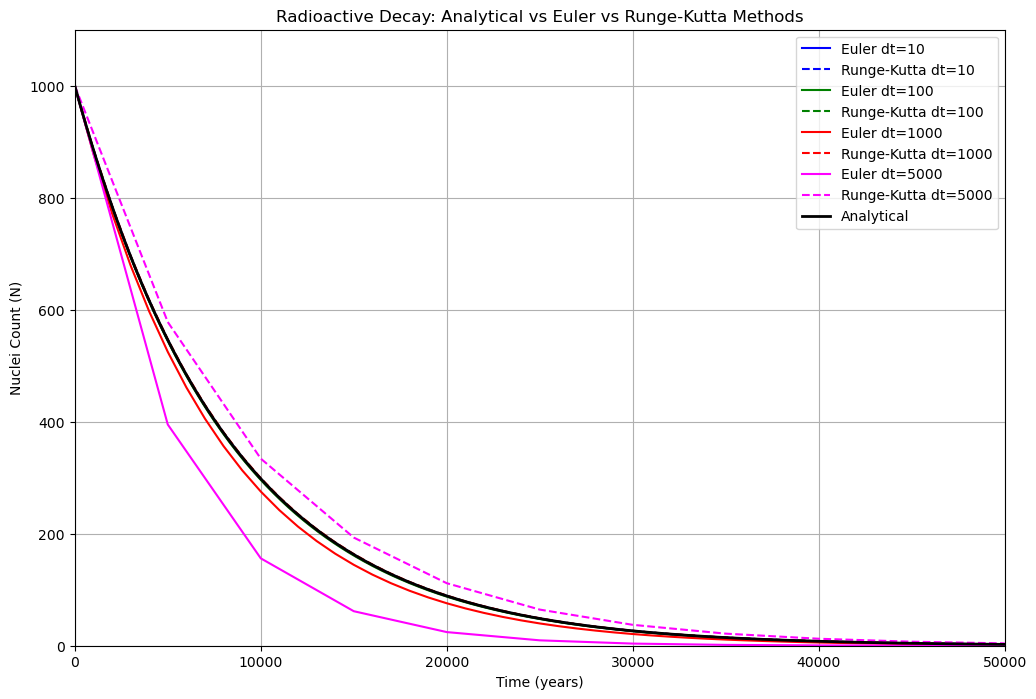

In [ ]:
lamb = 1.21e-4 
N_0 = 1000     
t_max = 50000  
dt_values = [10, 100, 1000, 5000] 

halflife_real = np.log(2) / lamb
print(f"Real Half-Life of Carbon-14: {halflife_real:.2f} years\n")

# Prepare the plot
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red', 'magenta']

for idx, dt in enumerate(dt_values):
    # Euler
    times_euler = np.arange(0, t_max + dt, dt)
    N_euler = [N_0]
    
    # euler integration
    for _ in times_euler[:-1]:
        N_next = N_euler[-1] - lamb * N_euler[-1] * dt
        N_euler.append(N_next)
    
    # half-life for euler
    half_life_euler = t_max
    for t, N in zip(times_euler, N_euler):
        if N <= N_0 / 2:
            half_life_euler = t
            break
    # Plot Euler Method
    plt.plot(times_euler, N_euler, color=colors[idx], label=f"Euler dt={dt}")
    

    # Runge-Kutta 
    times_rk = np.arange(0, t_max + dt, dt)
    N_rk = [N_0]
    
    # Perform Runge-Kutta integration
    for _ in times_rk[:-1]:
        k1 = -lamb * N_rk[-1]
        k2 = -lamb * (N_rk[-1] + k1 * dt / 2)
        N_next = N_rk[-1] + k2 * dt
        N_rk.append(N_next)
    
    # Find half-life for runge
    half_life_rk = t_max
    for t, N in zip(times_rk, N_rk):
        if N <= N_0 / 2:
            half_life_rk = t
            break

    plt.plot(times_rk, N_rk, linestyle='--', color=colors[idx],
             label=f"Runge-Kutta dt={dt}")
    
    print(f"Time-step (dt) = {dt} years")
    print(f"  Euler Method Half-Life: {half_life_euler} years")
    print(f"  Runge-Kutta Method Half-Life: {half_life_rk} years\n")


# Analytical Solution
times_analytical = np.linspace(0, t_max, 1000)
N_analytical = N_0 * np.exp(-lamb * times_analytical)

plt.plot(times_analytical, N_analytical, 'k-', label="Analytical", linewidth=2)
plt.xlabel("Time (years)")
plt.ylabel("Nuclei Count (N)")
plt.title("Radioactive Decay: Analytical vs Euler vs Runge-Kutta Methods")
plt.legend()
plt.grid(True)
plt.ylim(0, N_0 + 100)
plt.xlim(0, t_max)
plt.show()


Smaller time steps get the most accurate result by far but also euler seems to be more accurate in this example (from my code at least) not sure if that should be the case but RK is only going up to k2 soo I guess thats why


## Exercise 2 - The motion of a pendulum

The differential equation describing the motion of a simple pendulum of length $l$ is

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \sin(\theta) \ , $$

where $g$ is the local acceleration of gravity (on Earth, $g = 9.8$ m/s$^2$). For this exercise, consider $l = 10$ m. Here we will consider the simple case in which the maximal displacement of the pendulum is small, so that we can use the approximation $\sin(\theta) \approx \theta$ and consider the following, simplified, equation:

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \theta \ . $$

This equation can be solved analytically, giving the following expression for $\theta(t)$:

$$ \theta(t) = \theta_0 \cos \left(\sqrt{\frac{g}{l}} \, t \right) \ .$$

**(A)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically by implementing _**your own version**_ of the **Euler method**. Consider that at a time $t = 0$ the pendulum is at $\theta = 0.1$ radians, and it is not moving. 

**(B)** What is the displacement ($\theta$) of the pendulum at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s in your ODE integrator? How different is the value you obtain from the true one (calculated with the above equation)? How small should the time step be, if you want to have a discrepancy of at most 0.01 in the value of $\theta(t = 20$ s$)$?

**(C)** Implement _**your own version**_ of the **Euler-Cromer and Runge Kutta (order 4) algorithms**, and solve the differential equation again by using these methods. How big is the discrepancy from the real solution for these methods, at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s?

Numerical θ(t=20s) with τ=0.005s: 0.06115 radians
Analytical θ(t=20s): 0.05821 radians
Discrepancy: 0.00294 radians


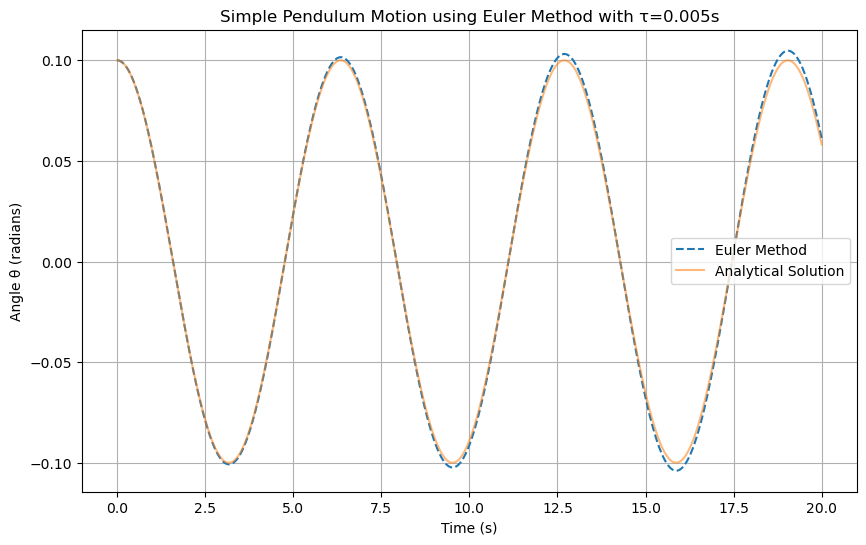

In [ ]:
g = 9.8        
l = 10.0       
theta0 = 0.1   
omega0 = 0.0   
tau = 0.005    
T = 20.0

# Number of steps
N = int(T / tau)

theta = np.zeros(N+1)
omega = np.zeros(N+1)
time = np.zeros(N+1)

# initial conditions
theta[0] = theta0
omega[0] = omega0
time[0] = 0.0

# Euler
for i in range(N):
    # Compute derivatives
    dtheta_dt = omega[i]
    domega_dt = - (g / l) * theta[i]
    
    # Update using Euler's method
    theta[i+1] = theta[i] + tau * dtheta_dt
    omega[i+1] = omega[i] + tau * domega_dt
    
    # Update time
    time[i+1] = time[i] + tau

# analytical solution
theta_analytical = theta0 * np.cos(np.sqrt(g/l) * time)

#  t = 20 s
theta_numerical = theta[-1]
theta_true = theta_analytical[-1]
discrepancy = abs(theta_numerical - theta_true)

print(f"Numerical θ(t=20s) with τ=0.005s: {theta_numerical:.5f} radians")
print(f"Analytical θ(t=20s): {theta_true:.5f} radians")
print(f"Discrepancy: {discrepancy:.5f} radians")

plt.figure(figsize=(10,6))
plt.plot(time, theta, label='Euler Method', linestyle='--')
plt.plot(time, theta_analytical, label='Analytical Solution', alpha=0.55)
plt.title('Simple Pendulum Motion using Euler Method with τ=0.005s')
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (radians)')
plt.legend()
plt.grid(True)
plt.show()



In [82]:
theta_ec = theta0
omega_ec = omega0

# Initialize arrays for RK4
theta_rk4 = theta0
omega_rk4 = omega0

# Analytical solution at t = 20s
omega_natural = np.sqrt(g / l)
theta_analytical = theta0 * np.cos(omega_natural * T)

# Euler-Cromer
for _ in range(N):
    omega_ec += tau * (-g / l) * theta_ec
    theta_ec += tau * omega_ec

def rk4_step(theta, omega, tau):
    # Define derivatives
    def dtheta_dt(omega):
        return omega

    def domega_dt(theta):
        return - (g / l) * theta

    k1_theta = dtheta_dt(omega)
    k1_omega = domega_dt(theta)

    k2_theta = dtheta_dt(omega + 0.5 * tau * k1_omega)
    k2_omega = domega_dt(theta + 0.5 * tau * k1_theta)

    k3_theta = dtheta_dt(omega + 0.5 * tau * k2_omega)
    k3_omega = domega_dt(theta + 0.5 * tau * k2_theta)

    k4_theta = dtheta_dt(omega + tau * k3_omega)
    k4_omega = domega_dt(theta + tau * k3_theta)

    theta_new = theta + (tau / 6) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
    omega_new = omega + (tau / 6) * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)
    return theta_new, omega_new

for _ in range(N):
    theta_rk4, omega_rk4 = rk4_step(theta_rk4, omega_rk4, tau)

# discrepancies
discrepancy_ec = abs(theta_ec - theta_analytical)
discrepancy_rk4 = abs(theta_rk4 - theta_analytical)


print(f"Analytical θ(t=20s): {theta_analytical:.5f} radians")
print(f"Euler-Cromer θ(t=20s): {theta_ec:.5f} radians")
print(f"Discrepancy (Euler-Cromer): {discrepancy_ec:.5f} radians")
print(f"RK4 θ(t=20s): {theta_rk4:.5f} radians")
print(f"Discrepancy (RK4): {discrepancy_rk4:.5f} radians")


Analytical θ(t=20s): -0.03090 radians
Euler-Cromer θ(t=20s): 0.05801 radians
Discrepancy (Euler-Cromer): 0.08891 radians
RK4 θ(t=20s): 0.05821 radians
Discrepancy (RK4): 0.08912 radians


## Exercise 3 - Motion of a mass attached to a spring

The differential equation describing the motion of a particle attached to a spring can be obtained by putting together Newton's 2nd law and Hooke's law, and it can be written as:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Choose some reasonable values for $k$ and $m$, define the initial conditions of your problem, and compute the analytic solution of your specific system, considering that the general solution is given by:

$$ x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} \, t\right) + v_0 \sqrt{\frac{m}{k}} \sin \left(\sqrt{\frac{k}{m}} \, t\right) \ , $$

where $x_0$ and $v_0$ are the position and velocity of the particle at time $t = 0$.

**(B)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically _**by using one of the built-in python methods**_ (take a look at the available methods in the `scipy` package).

**(C)** Plot your solution and compare it to the analytical solution.

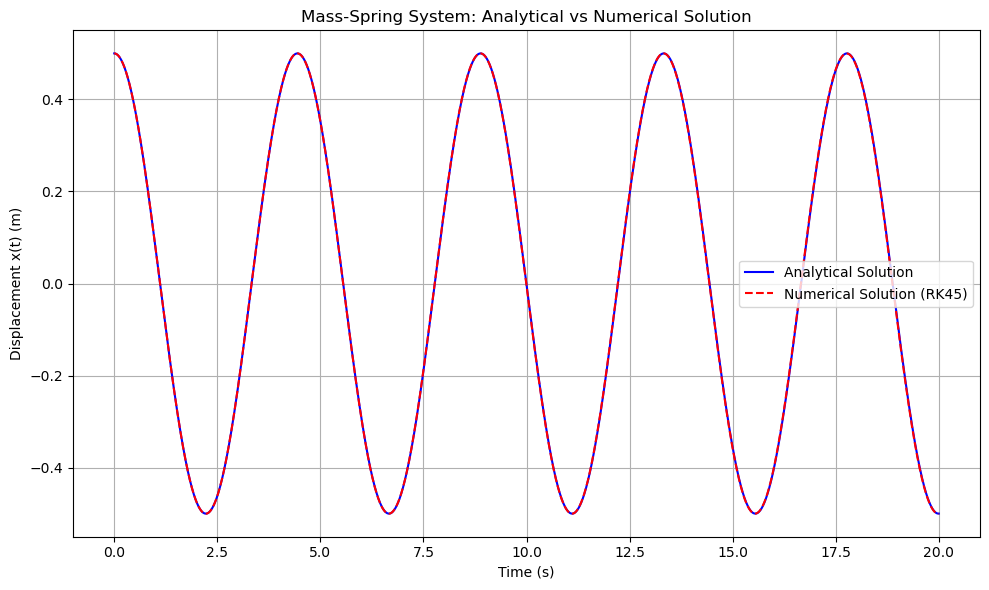

Displacement at t = 20 s:
Analytical: -0.49998 m
Numerical: -0.49977 m
Discrepancy: 0.00021 m


In [81]:
from scipy.integrate import solve_ivp

m = 5.0      # kg
k = 10.0      # spring const
x0 = 0.5   
v0 = 0.0      # initial pos/speed 
y0 = [x0, v0]
t_start = 0
t_end = 20
t_eval = np.linspace(t_start, t_end, 10000)

omega = np.sqrt(k / m)
T = 2 * np.pi / omega


def analytical_solution(t):
    return x0 * np.cos(omega * t) + (v0 / omega) * np.sin(omega * t)
x_analytical = analytical_solution(t_eval)

def mass_spring_system(t, y):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = - (k / m) * y1
    return [dy1_dt, dy2_dt]

# numerically using solve_ivp
solution = solve_ivp(
    mass_spring_system,
    [t_start, t_end],
    y0,
    t_eval=t_eval,
    method='RK45')

# Extract numerical solution
x_numerical = solution.y[0]
v_numerical = solution.y[1]

# discrepancy at t = 20 s
x_true = analytical_solution(t_end)
x_num = x_numerical[-1]
discrepancy = abs(x_num - x_true)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_eval, x_analytical, label='Analytical Solution', color='blue')
plt.plot(t_eval, x_numerical, '--', label='Numerical Solution (RK45)', color='red')
plt.title('Mass-Spring System: Analytical vs Numerical Solution')
plt.xlabel('Time (s)')
plt.ylabel('Displacement x(t) (m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Displacement at t = {t_end} s:")
print(f"Analytical: {x_true:.5f} m")
print(f"Numerical: {x_num:.5f} m")
print(f"Discrepancy: {discrepancy:.5f} m")